In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
df_test=pd.read_csv("test.csv")

In [7]:
#look for dataset
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
#look at columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
#look at the distribution of data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
#transform datatime to pandas datetime object
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')

In [13]:
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [16]:
#creating seperate columns for month day hours as we think they influence the counts
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['dayofweek']=df['datetime'].dt.dayofweek
df.drop(['datetime'],axis=1,inplace=True)

In [17]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,5


In [20]:
df.describe()
#if we observe the distributions we can see some ouliers in count,casual,registered as max values are very different from 75th quartile
#we can also see high standard deviations in these columns

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,19.000000,23.000000,6.000000


E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


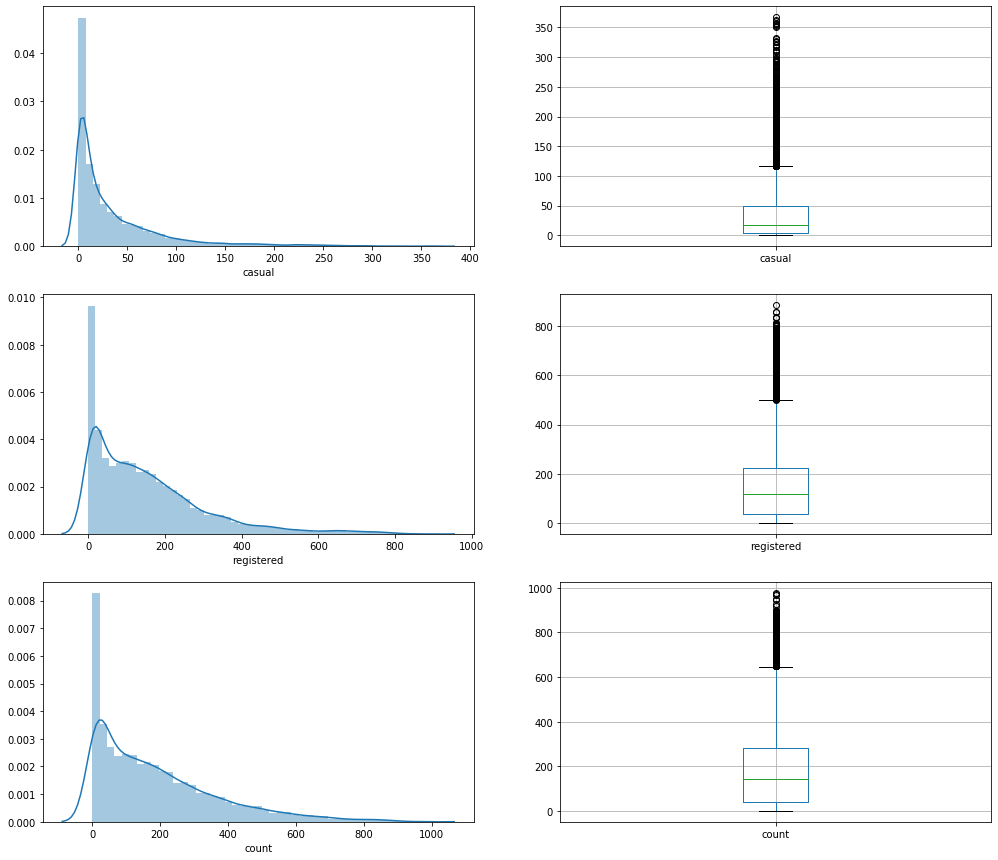

In [24]:
fig,ax=plt.subplots(3,2,figsize=(17,15))
#df['casual'] distribution plot
sns.distplot(df["casual"],ax=ax[0][0])
df.boxplot("casual", ax=ax[0][1])

#registered customers distribution plots
sns.distplot(df["registered"], ax=ax[1][0])
df.boxplot("registered", ax=ax[1][1])

#all customers distribution plots
sns.distplot(df["count"], ax=ax[2][0])
df.boxplot("count", ax=ax[2][1])

fig.show()

In [26]:
df['casual_log']=np.log(1+df['casual'])
df['registered_log']=np.log(1+df['registered'])
df['count_log']=np.log(1+df['count'])

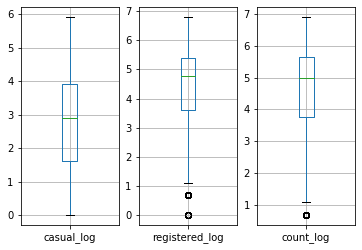

In [31]:
fig,ax=plt.subplots(1,3)
df.boxplot('casual_log',ax=ax[0])
df.boxplot('registered_log',ax=ax[1])
df.boxplot('count_log',ax=ax[2])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE80A9B088>],
      dtype=object)

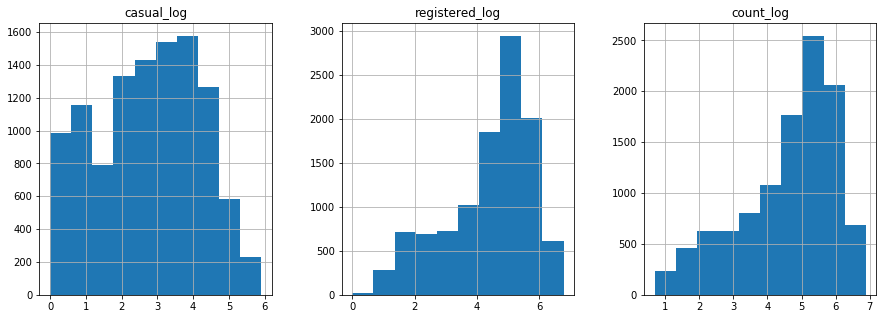

In [38]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
df.hist('casual_log',ax=ax[0])
df.hist('registered_log',ax=ax[1])
df.hist('count_log',ax=ax[2])

In [39]:
df.describe()
#we can see tha std are now reduced and data is normalised

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek,casual_log,registered_log,count_log
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,9.992559,11.541613,3.013963,2.712439,4.395774,4.591364
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,5.476608,6.915838,2.004585,1.491055,1.399383,1.419454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.693147
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,5.000000,6.000000,1.000000,1.609438,3.610918,3.761200
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,10.000000,12.000000,3.000000,2.890372,4.779123,4.983607
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,15.000000,18.000000,5.000000,3.912023,5.407172,5.652489
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,19.000000,23.000000,6.000000,5.908083,6.787845,6.885510


In [40]:
#now we'll see the correlation among features
corr=df.corr()

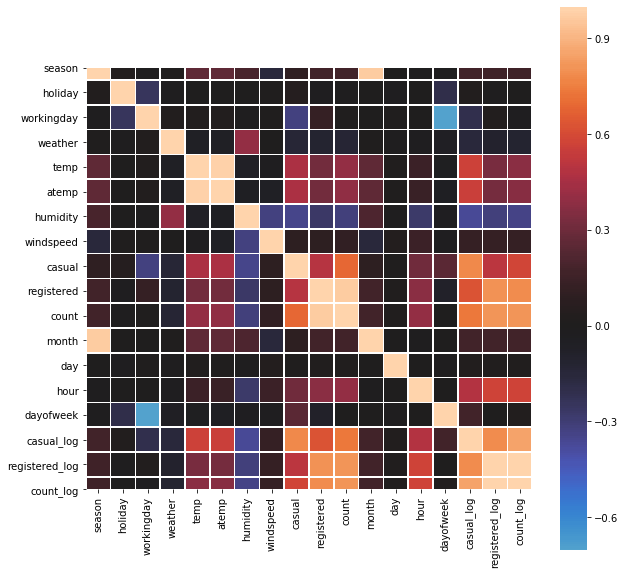

In [54]:
fg,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,square=True,linewidth=0.5,center=0)

In [68]:
corr['temp']
#as atemp and temp are highly correlated we can drop atemp

season            0.258689
holiday           0.000295
workingday        0.029966
weather          -0.055035
temp              1.000000
atemp             0.984948
humidity         -0.064949
windspeed        -0.017852
casual            0.467097
registered        0.318571
count             0.394454
month             0.257589
day               0.015551
hour              0.145430
dayofweek        -0.038466
casual_log        0.562596
registered_log    0.330701
count_log         0.376587
Name: temp, dtype: float64

In [64]:
def plot_counts(category):
    fig, ax = plt.subplots(1,3, figsize=(16,5), sharey=True)
    #title
    fig.suptitle("User Distribution According To " + category, fontsize=14)
    #plot 3 plots for count,casual and registered customers 
    sns.barplot(x = category, y = "count", data = df, ax = ax[0])
    sns.barplot(x = category, y = "casual", data = df, ax = ax[1])
    sns.barplot(x = category, y = "registered", data = df, ax = ax[2])
    fig.show()

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


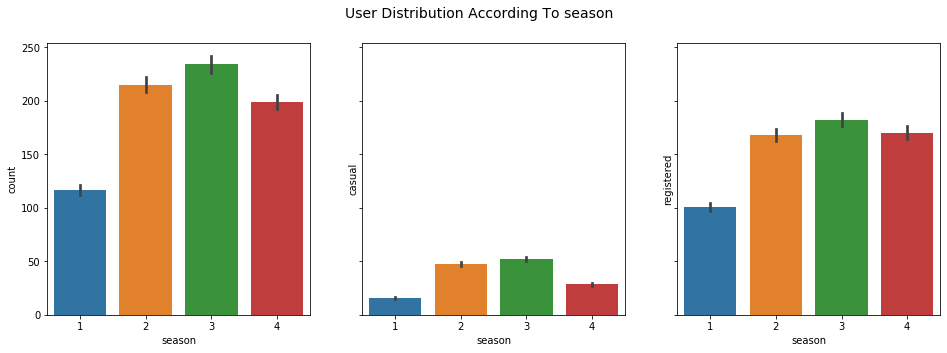

In [65]:
plot_counts('season')
#difference is seen in counts so we'll keep this feature

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


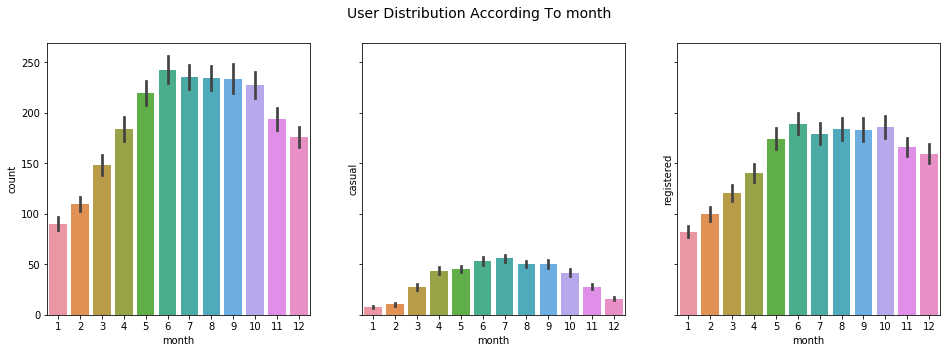

In [66]:
plot_counts('month')
#difference is seen so we'll keep this feature

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


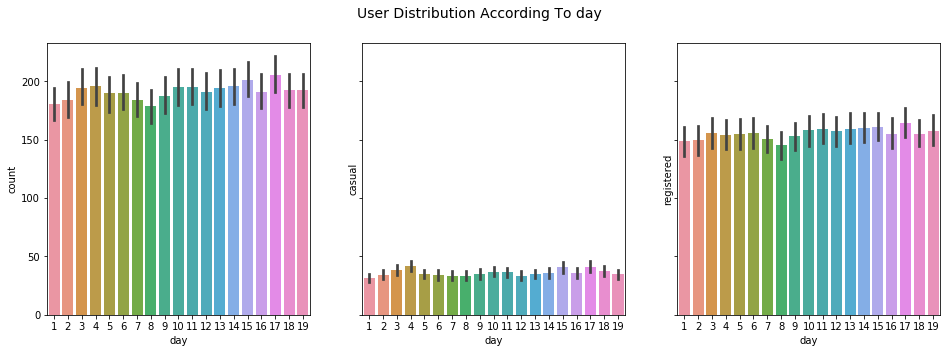

In [70]:
plot_counts('day')
#no significant difference seen, we can drop this feature

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


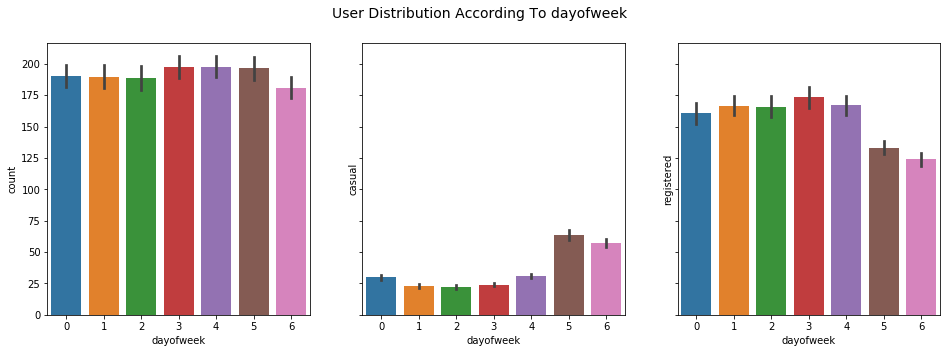

In [71]:
plot_counts('dayofweek')

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


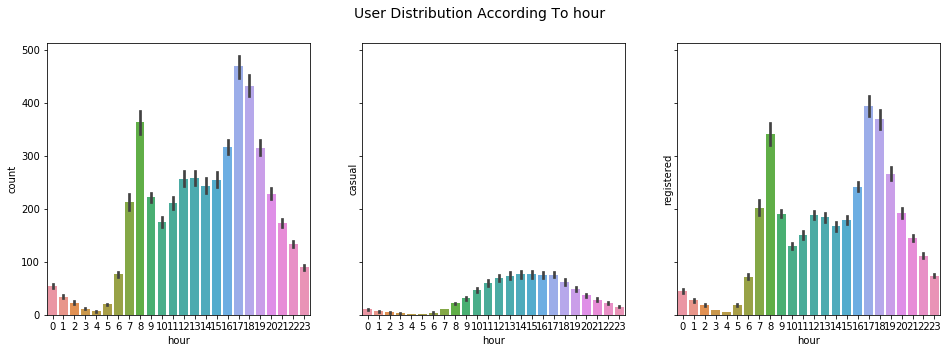

In [72]:
plot_counts('hour')

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


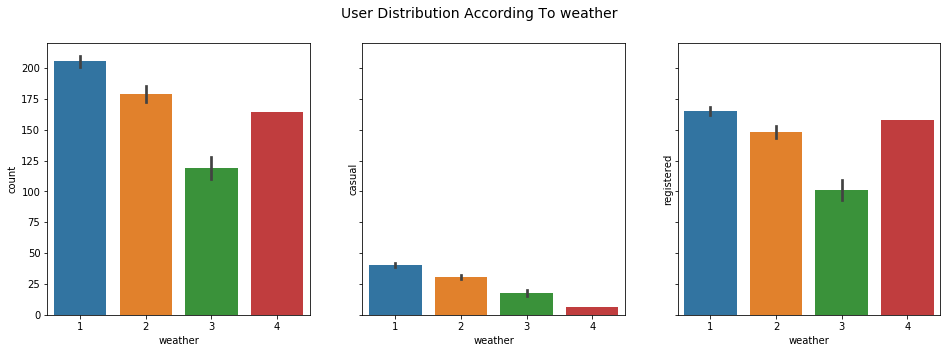

In [73]:
plot_counts('weather')

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


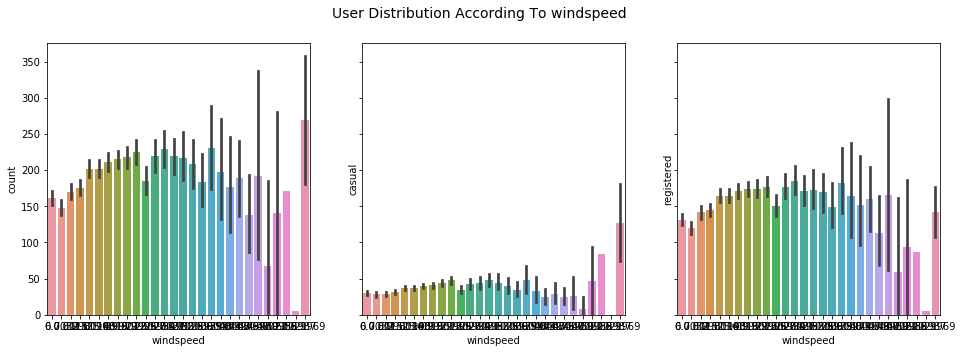

In [74]:
plot_counts('windspeed')
#this feature can be excluded

E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


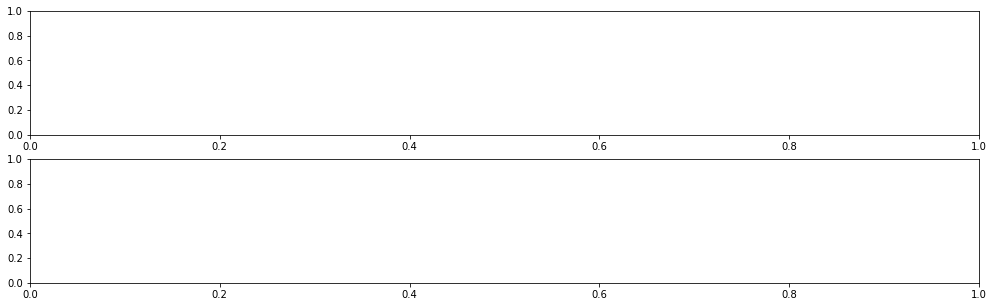

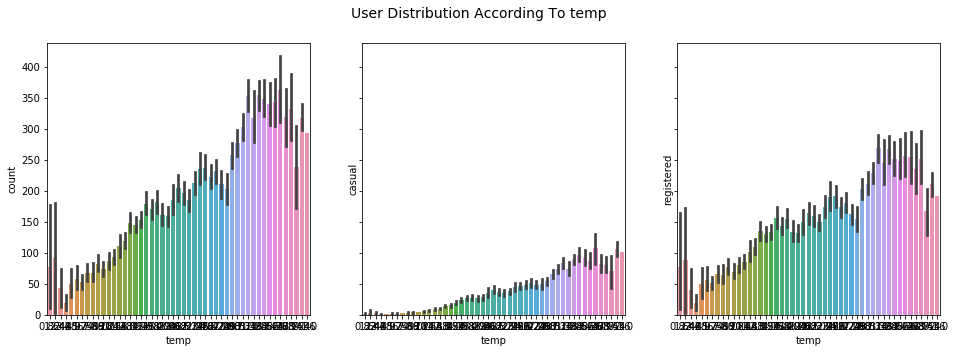

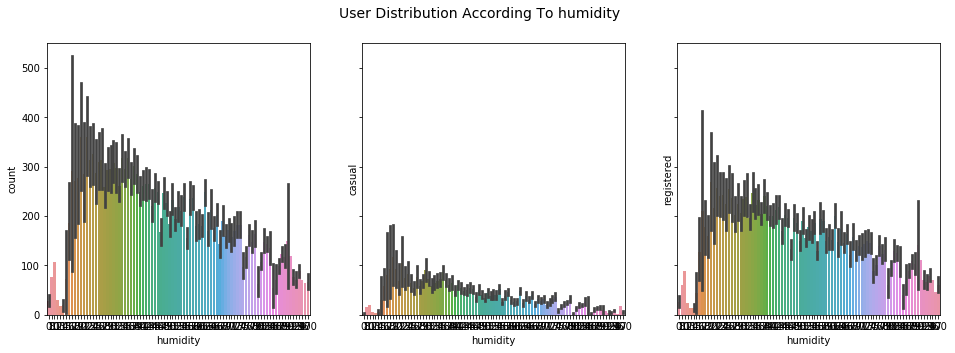

In [75]:
plot_counts('temp')
plot_counts('humidity')

In [76]:
#dropping atemp as it is highly correlated with temp
df.drop(['atemp'],axis=1,inplace=True)
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek,casual_log,registered_log,count_log
0,1,0,0,1,9.84,81,0.0,3,13,16,1,1,0,5,1.386294,2.639057,2.833213
1,1,0,0,1,9.02,80,0.0,8,32,40,1,1,1,5,2.197225,3.496508,3.713572
2,1,0,0,1,9.02,80,0.0,5,27,32,1,1,2,5,1.791759,3.332205,3.496508
3,1,0,0,1,9.84,75,0.0,3,10,13,1,1,3,5,1.386294,2.397895,2.639057
4,1,0,0,1,9.84,75,0.0,0,1,1,1,1,4,5,0.000000,0.693147,0.693147


In [77]:
#drop windspeed
df.drop(['windspeed'],axis=1,inplace=True)
df.head()

,season,holiday,workingday,weather,temp,humidity,casual,registered,count,month,day,hour,dayofweek,casual_log,registered_log,count_log
0,1,0,0,1,9.84,81,3,13,16,1,1,0,5,1.386294,2.639057,2.833213
1,1,0,0,1,9.02,80,8,32,40,1,1,1,5,2.197225,3.496508,3.713572
2,1,0,0,1,9.02,80,5,27,32,1,1,2,5,1.791759,3.332205,3.496508
3,1,0,0,1,9.84,75,3,10,13,1,1,3,5,1.386294,2.397895,2.639057
4,1,0,0,1,9.84,75,0,1,1,1,1,4,5,0.000000,0.693147,0.693147


In [81]:
#we can drop holidays,day,dayofweek feature due to less variance they have
df.drop(['holiday','day','dayofweek'],axis=1,inplace=True)
df.head()

,season,workingday,weather,temp,humidity,casual,registered,count,month,hour,casual_log,registered_log,count_log
0,1,0,1,9.84,81,3,13,16,1,0,1.386294,2.639057,2.833213
1,1,0,1,9.02,80,8,32,40,1,1,2.197225,3.496508,3.713572
2,1,0,1,9.02,80,5,27,32,1,2,1.791759,3.332205,3.496508
3,1,0,1,9.84,75,3,10,13,1,3,1.386294,2.397895,2.639057
4,1,0,1,9.84,75,0,1,1,1,4,0.000000,0.693147,0.693147


E:\programs\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


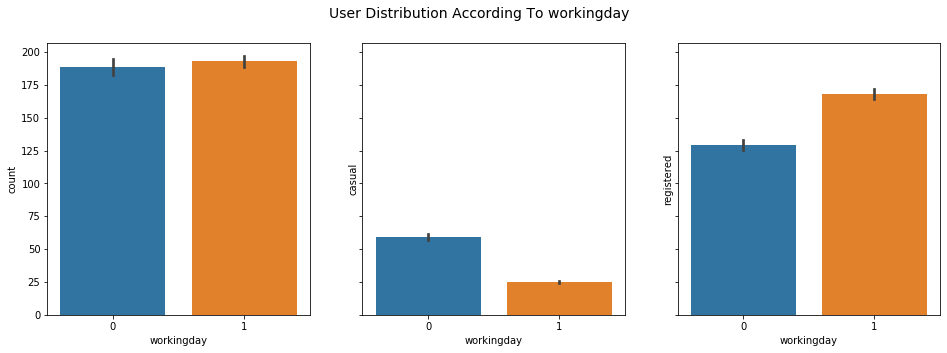

In [83]:
plot_counts('workingday')#we can drop this feature

In [84]:
df=df.drop(['workingday'],axis=1)
df.head()

,season,weather,temp,humidity,casual,registered,count,month,hour,casual_log,registered_log,count_log
0,1,1,9.84,81,3,13,16,1,0,1.386294,2.639057,2.833213
1,1,1,9.02,80,8,32,40,1,1,2.197225,3.496508,3.713572
2,1,1,9.02,80,5,27,32,1,2,1.791759,3.332205,3.496508
3,1,1,9.84,75,3,10,13,1,3,1.386294,2.397895,2.639057
4,1,1,9.84,75,0,1,1,1,4,0.000000,0.693147,0.693147


In [86]:
#one hot encoding of categorical features
encoded=df.join(pd.get_dummies(df['season'],prefix='season'))

In [87]:
encoded.head()

,season,weather,temp,humidity,casual,registered,count,month,hour,casual_log,registered_log,count_log,season_1,season_2,season_3,season_4
0,1,1,9.84,81,3,13,16,1,0,1.386294,2.639057,2.833213,1,0,0,0
1,1,1,9.02,80,8,32,40,1,1,2.197225,3.496508,3.713572,1,0,0,0
2,1,1,9.02,80,5,27,32,1,2,1.791759,3.332205,3.496508,1,0,0,0
3,1,1,9.84,75,3,10,13,1,3,1.386294,2.397895,2.639057,1,0,0,0
4,1,1,9.84,75,0,1,1,1,4,0.000000,0.693147,0.693147,1,0,0,0


In [88]:
encoded=encoded.join(pd.get_dummies(df['weather'],prefix='weather'))
encoded.head()

,season,weather,temp,humidity,casual,registered,count,month,hour,casual_log,registered_log,count_log,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,1,9.84,81,3,13,16,1,0,1.386294,2.639057,2.833213,1,0,0,0,1,0,0,0
1,1,1,9.02,80,8,32,40,1,1,2.197225,3.496508,3.713572,1,0,0,0,1,0,0,0
2,1,1,9.02,80,5,27,32,1,2,1.791759,3.332205,3.496508,1,0,0,0,1,0,0,0
3,1,1,9.84,75,3,10,13,1,3,1.386294,2.397895,2.639057,1,0,0,0,1,0,0,0
4,1,1,9.84,75,0,1,1,1,4,0.000000,0.693147,0.693147,1,0,0,0,1,0,0,0


In [89]:
#dropping unwanted columns
encoded.drop(['season','weather','month','count','casual','registered'],axis=1,inplace=True)
encoded.head()

,temp,humidity,hour,casual_log,registered_log,count_log,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,81,0,1.386294,2.639057,2.833213,1,0,0,0,1,0,0,0
1,9.02,80,1,2.197225,3.496508,3.713572,1,0,0,0,1,0,0,0
2,9.02,80,2,1.791759,3.332205,3.496508,1,0,0,0,1,0,0,0
3,9.84,75,3,1.386294,2.397895,2.639057,1,0,0,0,1,0,0,0
4,9.84,75,4,0.000000,0.693147,0.693147,1,0,0,0,1,0,0,0


In [90]:
x=encoded.drop(['count_log','casual_log','registered_log'],axis=1)
x.head()

,temp,humidity,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,81,0,1,0,0,0,1,0,0,0
1,9.02,80,1,1,0,0,0,1,0,0,0
2,9.02,80,2,1,0,0,0,1,0,0,0
3,9.84,75,3,1,0,0,0,1,0,0,0
4,9.84,75,4,1,0,0,0,1,0,0,0


In [91]:
y=encoded['count_log']
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count_log, Length: 10886, dtype: float64

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.25)

In [95]:
x1.shape

(8164, 11)

In [97]:
y1.shape

(8164,)

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
reg=LinearRegression()

In [102]:
reg.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
reg.score(x2,y2)

0.4737395041969992

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
reg2=DecisionTreeRegressor()

In [112]:
reg2.fit(x1,y1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [113]:
reg2.score(x1,y1)

0.9770539410770034

In [114]:
reg2.score(x2,y2)

0.6363249138604339

In [115]:
from sklearn.neighbors import KNeighborsRegressor

In [116]:
reg3=KNeighborsRegressor()

In [117]:
reg3.fit(x1,y1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [118]:
reg3.score(x2,y2)

0.7655391144842922